In [1]:
# Libraries required

import pandas as pd
import numpy as np
import matplotlib as plt

from sklearn.linear_model import Lasso
# from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklego.meta import ZeroInflatedRegressor

from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

from mypipes_hackathon import * # Pipeline file import

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Loading the data
df_train = pd.read_csv(r'/home/siddarth.jha@npci.org.in/Documents/Training/hackathon_data/data_train.csv')
df_test = pd.read_csv(r'/home/siddarth.jha@npci.org.in/Documents/Training/hackathon_data/data_test.csv')
df_train

,id,target,ind_01,ind_02_cat,ind_03,ind_04_cat,ind_05_cat,ind_06_bin,ind_07_bin,ind_08_bin,...,calc_11,calc_12,calc_13,calc_14,calc_15_bin,calc_16_bin,calc_17_bin,calc_18_bin,calc_19_bin,calc_20_bin
0,1260014,0,0,2,4,0,0,0,0,1,...,8,1,2,9,0,0,0,0,0,0
1,1086017,6520,1,1,1,0,4,1,0,0,...,1,1,2,4,0,1,1,0,1,0
2,602774,8570,5,1,3,1,0,0,0,1,...,6,1,5,11,0,1,1,1,0,0
3,366031,0,3,1,3,0,0,0,0,1,...,8,2,1,5,0,0,1,0,1,0
4,103981,0,0,1,5,0,0,0,1,0,...,8,0,1,12,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39784,835163,12430,0,2,0,0,-1,1,0,0,...,6,1,4,14,0,1,1,0,1,0
39785,680115,32440,4,2,1,1,0,0,1,0,...,6,0,2,11,0,1,1,1,0,1
39786,402120,5760,1,1,7,0,0,1,0,0,...,7,2,3,4,0,1,1,0,1,1
39787,968745,0,0,1,5,0,0,0,0,0,...,9,1,3,7,0,1,0,1,0,1


In [3]:
# df_test

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39789 entries, 0 to 39788
Data columns (total 59 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           39789 non-null  int64  
 1   target       39789 non-null  int64  
 2   ind_01       39789 non-null  int64  
 3   ind_02_cat   39789 non-null  int64  
 4   ind_03       39789 non-null  int64  
 5   ind_04_cat   39789 non-null  int64  
 6   ind_05_cat   39789 non-null  int64  
 7   ind_06_bin   39789 non-null  int64  
 8   ind_07_bin   39789 non-null  int64  
 9   ind_08_bin   39789 non-null  int64  
 10  ind_09_bin   39789 non-null  int64  
 11  ind_10_bin   39789 non-null  int64  
 12  ind_11_bin   39789 non-null  int64  
 13  ind_12_bin   39789 non-null  int64  
 14  ind_13_bin   39789 non-null  int64  
 15  ind_14       39789 non-null  int64  
 16  ind_15       39789 non-null  int64  
 17  ind_16_bin   39789 non-null  int64  
 18  ind_17_bin   39789 non-null  int64  
 19  ind_

In [5]:
# df_test.info()

In [6]:
df_train['car_05_cat'].value_counts()

-1    16663
 1    12146
 0    10980
Name: car_05_cat, dtype: int64

In [7]:
# Pipeline

'''
1. DROP: id and target(for training--> x_train)
2. Impute missing & Dummy: ind_02_cat', 'ind_04_cat', 'ind_05_cat', 'car_01_cat', 'car_02_cat', 'car_03_cat',
             'car_04_cat','car_05_cat', 'car_06_cat', 'car_07_cat', 'car_08_cat', 'car_09_cat', 'car_10_cat', 
             'car_11_cat'
3. Impute Missing for all the remaining columns
'''

"\n1. DROP: id and target(for training--> x_train)\n2. Impute missing & Dummy: ind_02_cat', 'ind_04_cat', 'ind_05_cat', 'car_01_cat', 'car_02_cat', 'car_03_cat',\n             'car_04_cat','car_05_cat', 'car_06_cat', 'car_07_cat', 'car_08_cat', 'car_09_cat', 'car_10_cat', \n             'car_11_cat'\n3. Impute Missing for all the remaining columns\n"

<AxesSubplot:>

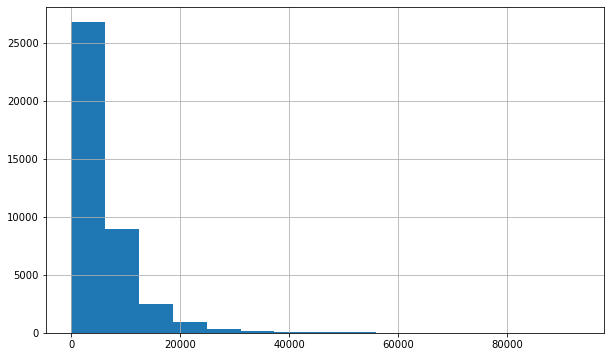

In [8]:
# Visualising the target variable
df_train['target'].hist(bins=15, figsize=(10, 6))

In [9]:
# Prcoessing Data
del df_train['id'] # DROP ID
del df_test['id']

y_train = df_train['target']
y_train = pd.DataFrame(y_train)

del df_train['target']

cat_vars = ['ind_02_cat', 'ind_04_cat', 'ind_05_cat', 'car_01_cat', 'car_02_cat', 'car_03_cat', 'car_04_cat',
            'car_05_cat', 'car_06_cat', 'car_07_cat', 'car_08_cat', 'car_09_cat', 'car_10_cat', 'car_11_cat']
num_vars = [var for var in df_train if var not in cat_vars]

In [10]:
p1 = pdPipeline([
    ('var_select', VarSelector(cat_vars)),
    ('missing_trt', DataFrameImputer()),
    ('dummies', get_dummies(1800))
])

p2 = pdPipeline([
    ('var_select', VarSelector(num_vars)),
    ('missing_trt', DataFrameImputer()),
])

data_pipe = FeatureUnion([
    ('int_to_dum', p1),
    ('impute_miss', p2)
])

In [11]:
x_train=pd.DataFrame(data=data_pipe.fit_transform(df_train),
                     columns=data_pipe.get_feature_names())
x_test=pd.DataFrame(data=data_pipe.transform(df_test),
                     columns=data_pipe.get_feature_names())
x_train.shape

(39789, 71)

In [12]:
# x_train
def report(results, n_top=3): # Report function for our model and parameter performance
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.6f} (std: {1:.6f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

### ZERO INFLATED REGRESSION

In [13]:
zir = ZeroInflatedRegressor(
    classifier=RandomForestClassifier(),
    regressor=RandomForestRegressor()
)

The Pre-defined ZeroInflationRegressor uses all the scikit classification & regression models. First it classifies the target variable (claims in our dataset) whether it is zero or non zero. (This is because there is a huge portion of zeros in target variable). Once the classification is done then it performs the regression on the non-zero target variable values and predicts the claim value to nearest value possible.

### I have used different algorithms and repeatedly tuned each model and kept only the best model and removed the remaining model and their parameters

In [14]:
# lambda range has been selected after multiple tuning
lambdas=np.linspace(.001,.8,100)

params = {"classifier__n_estimators":[100,200,300,500,700,1000],
            "classifier__max_features": [5,10,20,25,30,35,40,45,50,55,60,65], #70
            "classifier__bootstrap": [True, False],
            'classifier__class_weight':[None,'balanced'], 
            'classifier__criterion':['entropy','gini'],
            'classifier__max_depth':[None,5,10,15,20,30,50,70],
            'classifier__min_samples_leaf':[1,2,5,10,15,20], 
            'classifier__min_samples_split':[2,5,10,15,20],
            'classifier__random_state':[42],
            'regressor__random_state':[42],
            'regressor__ccp_alpha':lambdas,
            'regressor__max_depth':[None,5,10,15,20,30,50,70],
            'regressor__min_samples_leaf':[1,2,5,10,15,20], 
            'regressor__min_samples_split':[2,5,10,15,20],
          
            "regressor__n_estimators":[50,100,200], # Added extra 300 &400
            "regressor__max_features": [5,10,20,25,30,35,40,45,50,55,60,65], #70
            "regressor__bootstrap": [True, False],
                  }

In [15]:
random_search=RandomizedSearchCV(zir,
                         param_distributions=params,
                         cv=10,
                         scoring="neg_mean_absolute_error",
                         n_jobs=-1,
                         verbose=20,
                        return_train_score=True
)

In [16]:
random_search.fit(x_train,y_train.values.ravel())

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=ZeroInflatedRegressor(classifier=RandomForestClassifier(),
                                                   regressor=RandomForestRegressor()),
                   n_jobs=-1,
                   param_distributions={'classifier__bootstrap': [True, False],
                                        'classifier__class_weight': [None,
                                                                     'balanced'],
                                        'classifier__criterion': ['entropy',
                                                                  'gini'],
                                        'classifier__max_depth': [None, 5, 10,
                                                                  15, 20, 30,
                                                                  50, 70],
                                        'classifier__ma...
       0.76771717, 0.77578788, 0.78385859, 0.79192929, 0.8       ]),
                    

In [17]:
model = random_search.best_estimator_

In [18]:
random_search.best_estimator_

ZeroInflatedRegressor(classifier=RandomForestClassifier(bootstrap=False,
                                                        criterion='entropy',
                                                        max_features=30,
                                                        min_samples_leaf=5,
                                                        n_estimators=300),
                      regressor=RandomForestRegressor(ccp_alpha=0.42067676767676765,
                                                      max_features=45,
                                                      min_samples_leaf=2,
                                                      min_samples_split=5))

In [19]:
report(random_search.cv_results_,5)
# The best score was without using random_state and after the assigning value to random_state I couldn't get the 
# my best score.

Model with rank: 1
Mean validation score: -2385.319163 (std: 57.364971)
Parameters: {'regressor__n_estimators': 100, 'regressor__min_samples_split': 5, 'regressor__min_samples_leaf': 2, 'regressor__max_features': 45, 'regressor__max_depth': None, 'regressor__ccp_alpha': 0.42067676767676765, 'regressor__bootstrap': True, 'classifier__n_estimators': 300, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 5, 'classifier__max_features': 30, 'classifier__max_depth': None, 'classifier__criterion': 'entropy', 'classifier__class_weight': None, 'classifier__bootstrap': False}

Model with rank: 2
Mean validation score: -2523.823798 (std: 69.262440)
Parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 20, 'regressor__min_samples_leaf': 10, 'regressor__max_features': 50, 'regressor__max_depth': 20, 'regressor__ccp_alpha': 0.7435050505050504, 'regressor__bootstrap': True, 'classifier__n_estimators': 200, 'classifier__min_samples_split': 15, 'classifier__min_

In [20]:
model.fit(x_train, y_train)

ZeroInflatedRegressor(classifier=RandomForestClassifier(bootstrap=False,
                                                        criterion='entropy',
                                                        max_features=30,
                                                        min_samples_leaf=5,
                                                        n_estimators=300),
                      regressor=RandomForestRegressor(ccp_alpha=0.42067676767676765,
                                                      max_features=45,
                                                      min_samples_leaf=2,
                                                      min_samples_split=5))

In [21]:
y_predict = model.predict(x_test)

In [22]:
pd.DataFrame(y_predict).to_csv("sample_submission.csv",index=False) 

In [23]:
model

ZeroInflatedRegressor(classifier=RandomForestClassifier(bootstrap=False,
                                                        criterion='entropy',
                                                        max_features=30,
                                                        min_samples_leaf=5,
                                                        n_estimators=300),
                      regressor=RandomForestRegressor(ccp_alpha=0.42067676767676765,
                                                      max_features=45,
                                                      min_samples_leaf=2,
                                                      min_samples_split=5))